In [1]:
import os
import tensorflow as tf 
from PIL import Image
import shutil  
import matplotlib.pyplot as plt
import numpy as np
import cv2

plt.xlabel('类别')
plt.ylabel('数量')
plt.title('图片数量统计图')
a = plt.subplot(1, 1, 1)

x1 =[40,80,120,160,200,240,280,320,360,400,440,480,520,560,600,640,680,720,760,800,840,880,920,960,1000,1040,1080,1120,1160,1200,1240,1280,1320]
x2 =[45,85,125,165,205,245,285,325,365,405,445,485,525,565,605,645,685,725,765,805,845,885,925,965,1005,1045,1085,1125,1165,1205,1245,1285,1325]

train_tj = {}
validation_tj = {}



cwd = "data/车牌字符识别训练数据/"

classes ={"数字", "字母"}
classesnum = {"0":0,"1":1,"2":2,"3":3,"4":4,"5":5,"6":6,"7":7,"8":8,"9":9}
classesletter={"A":10,"B":11,"C":12,"D":13,"E":14,"F":15,"G":16,"H":17,"J":18,"K":19,"L":20,"M":21,"N":22,"P":23,"Q":24,"R":25,"S":26,"T":27,"U":28,"V":29,"W":30,"S":31,"Y":32,"Z":33}

writerv = tf.python_io.TFRecordWriter("validation.tfrecords")
writert = tf.python_io.TFRecordWriter("train.tfrecords")
for index, name in enumerate(classes):
    if name == "数字": 
        for index, i in enumerate(classesnum):
            n = 0  #用于判断数据集分割条件
            train_num = 0
            validation_num = 0
            class_path = cwd + name +"/"+ i + "/"
            dirs = os.listdir(class_path)
            for img_name in dirs:
                n = n + 1
                img_path = class_path + img_name
                img = Image.open(img_path)
                img = img.resize((24, 48))
                img_raw = img.tobytes()              #将图片转化为原生bytes
                example = tf.train.Example(features=tf.train.Features(feature={
                    "label": tf.train.Feature(int64_list=tf.train.Int64List(value=[classesnum[i]])),
                    'img_raw': tf.train.Feature(bytes_list=tf.train.BytesList(value=[img_raw]))
                }))
                if n < len(dirs)*0.75:
                    writert.write(example.SerializeToString())#写入train.tfrecords
                    
                    train_num = train_num + 1
                else:
                    writerv.write(example.SerializeToString())  #写入validation.tfrecords
                    validation_num = validation_num + 1
            train_tj[i] = train_num
            validation_tj[i] = validation_num
            
    else:
        for index, i in enumerate(classesletter):
            n = 0
            train_num = 0
            validation_num = 0
            class_path = cwd + name + "/" + i + "/"
            dirs = os.listdir(class_path)
            for img_name in dirs:
                n = n + 1
                img_path = class_path + img_name
                img = Image.open(img_path)
                img = img.resize((24, 48))
                img_raw = img.tobytes()              #将图片转化为原生bytes
                example = tf.train.Example(features=tf.train.Features(feature={
                    "label": tf.train.Feature(int64_list=tf.train.Int64List(value=[classesletter[i]])),
                    'img_raw': tf.train.Feature(bytes_list=tf.train.BytesList(value=[img_raw]))
                }))
                if n<len(dirs)*0.75:   
                    writert.write(example.SerializeToString())
                    train_num = train_num + 1
                else:
                    writerv.write(example.SerializeToString())  #序列化为字符串
                    validation_num = validation_num + 1
            train_tj[i] = train_num
            validation_tj[i] = validation_num

writerv.close()
writert.close()

/home/haiyang/venv/lib/python3.6/site-packages/ipykernel/__main__.py:46: DeprecationWarning: PyUnicode_AsEncodedObject() is deprecated; use PyUnicode_AsEncodedString() to encode from str to bytes or PyCodec_Encode() for generic encoding
/home/haiyang/venv/lib/python3.6/site-packages/ipykernel/__main__.py:73: DeprecationWarning: PyUnicode_AsEncodedObject() is deprecated; use PyUnicode_AsEncodedString() to encode from str to bytes or PyCodec_Encode() for generic encoding


In [2]:

y_1 = list(train_tj)
y_2 = list(validation_tj)

y1 = list()
y2 = list()
for i in y_1:
    y1.append(train_tj[i])
for i in y_2:
    y2.append(validation_tj[i])

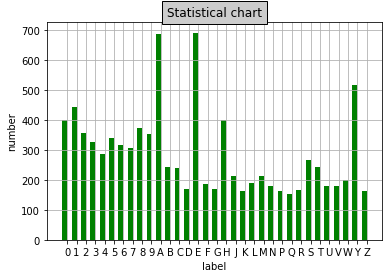

In [18]:
def draw_bar(labels,quants):  
    width = 0.5  
    ind = np.linspace(0.35,31,33) 
    # make a square figure  
    fig = plt.figure(1)  
    ax  = fig.add_subplot(111)  
    # Bar Plot  
    ax.bar(ind-width/2,quants,width,color='green')      
    # Set the ticks on x-axis  
    ax.set_xticks(ind)  
    ax.set_xticklabels(labels)  
    # labels  
    ax.set_xlabel('label')  
    ax.set_ylabel('number')  
    # title  
    ax.set_title('Statistical chart', bbox={'facecolor':'0.8', 'pad':5}) 
    
    plt.grid(True)  
    plt.show()  
    plt.savefig("bar.jpg")  
    plt.close()  

draw_bar(y_1,y1)

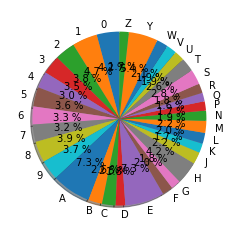

'\nlabeldistance，文本的位置离远点有多远，1.1指1.1倍半径的位置\n\nautopct，圆里面的文本格式，%3.1f%%表示小数有三位，整数有一位的浮点数\n\nshadow，饼是否有阴影\n\nstartangle，起始角度，0，表示从0开始逆时针转，为第一块。一般选择从90度开始比较好看\n\npctdistance，百分比的text离圆心的距离\n\npatches, l_texts, p_texts，为了得到饼图的返回值，p_texts饼图内部文本的，l_texts饼图外label的文本\n\n'

In [6]:
plt.axes(aspect=1)  # aspect = 1是圆形，否在是椭圆
#autopct ，show percet
plt.pie(x=y1, labels=y_1, explode=None,autopct='%3.1f %%',
        shadow=True, labeldistance=1.1, startangle = 90,pctdistance = 0.6
 
        )
plt.show()

'''
labeldistance，文本的位置离远点有多远，1.1指1.1倍半径的位置

autopct，圆里面的文本格式，%3.1f%%表示小数有三位，整数有一位的浮点数

shadow，饼是否有阴影

startangle，起始角度，0，表示从0开始逆时针转，为第一块。一般选择从90度开始比较好看

pctdistance，百分比的text离圆心的距离

patches, l_texts, p_texts，为了得到饼图的返回值，p_texts饼图内部文本的，l_texts饼图外label的文本

'''

In [8]:
print(train_tj)
print(validation_tj)

{'0': 400, '1': 443, '2': 358, '3': 328, '4': 287, '5': 341, '6': 317, '7': 305, '8': 372, '9': 353, 'A': 688, 'B': 243, 'C': 239, 'D': 169, 'E': 691, 'F': 186, 'G': 170, 'H': 401, 'J': 212, 'K': 164, 'L': 191, 'M': 212, 'N': 179, 'P': 164, 'Q': 152, 'R': 167, 'S': 266, 'T': 242, 'U': 179, 'V': 179, 'W': 201, 'Y': 516, 'Z': 164}
{'0': 134, '1': 148, '2': 120, '3': 110, '4': 97, '5': 114, '6': 106, '7': 102, '8': 125, '9': 119, 'A': 230, 'B': 82, 'C': 80, 'D': 57, 'E': 231, 'F': 63, 'G': 58, 'H': 135, 'J': 72, 'K': 55, 'L': 64, 'M': 71, 'N': 61, 'P': 56, 'Q': 51, 'R': 56, 'S': 90, 'T': 82, 'U': 60, 'V': 60, 'W': 68, 'Y': 173, 'Z': 56}


In [9]:
print(list(train_tj))

['0', '1', '2', '3', '4', '5', '6', '7', '8', '9', 'A', 'B', 'C', 'D', 'E', 'F', 'G', 'H', 'J', 'K', 'L', 'M', 'N', 'P', 'Q', 'R', 'S', 'T', 'U', 'V', 'W', 'Y', 'Z']


In [10]:
num = {}

In [11]:
for i in (list(train_tj)):
    num[i] = train_tj[i]+validation_tj[i]
print(num)

{'0': 534, '1': 591, '2': 478, '3': 438, '4': 384, '5': 455, '6': 423, '7': 407, '8': 497, '9': 472, 'A': 918, 'B': 325, 'C': 319, 'D': 226, 'E': 922, 'F': 249, 'G': 228, 'H': 536, 'J': 284, 'K': 219, 'L': 255, 'M': 283, 'N': 240, 'P': 220, 'Q': 203, 'R': 223, 'S': 356, 'T': 324, 'U': 239, 'V': 239, 'W': 269, 'Y': 689, 'Z': 220}


['0', '1', '2', '3', '4', '5', '6', '7', '8', '9', 'A', 'B', 'C', 'D', 'E', 'F', 'G', 'H', 'J', 'K', 'L', 'M', 'N', 'P', 'Q', 'R', 'S', 'T', 'U', 'V', 'W', 'Y', 'Z']


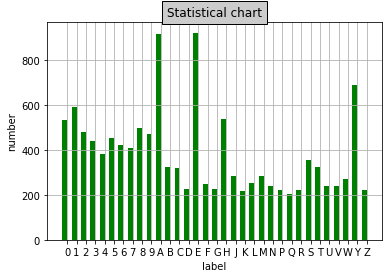

In [12]:
q = list(num)
print(q)
q_1 = list()
for i in q:
    q_1.append(num[i])
draw_bar(q,q_1)